In [89]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Linear Regression

In [90]:
data = np.loadtxt("ex1data1.txt", delimiter=',')
X = data[:, 0][:, np.newaxis]
y = data[:, 1]
X[:5]

array([[6.1101],
       [5.5277],
       [8.5186],
       [7.0032],
       [5.8598]])

In [91]:
# Plotting the Data

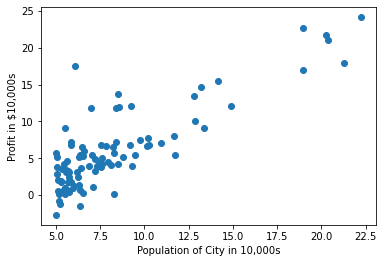

In [92]:
plt.figure()
plt.scatter(X[:, 0], y)
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()

In [93]:
# Cost Function & Gradient Descent

def computeCost(X, y, theta):
    h = np.dot(X, theta) - y
    J = np.dot(h, h) / (2 * X.shape[0])
    return J

def gradientDescent(X, y, theta, alpha, num_iters):
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        theta = (theta - (alpha / X.shape[0])
                 * np.dot(X.T, (np.dot(X, theta) - y)))   
        J_history[i] = computeCost(X, y, theta)
    return theta, J_history

In [94]:
X_train = np.hstack((np.ones((X.shape[0], 1)), X))
theta = np.array([0, 0])
alpha = 0.01
num_iters = 1500
theta, J_history = gradientDescent(X_train, y, theta, alpha, num_iters)
print(theta)

[-3.63029144  1.16636235]


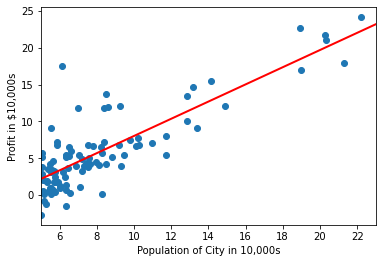

In [95]:
plt.figure()
plt.scatter(X[:, 0], y)
X_plot = np.linspace(5, 23, 100)
plt.plot(X_plot, theta[0] + X_plot * theta[1],
         color="red", linewidth=2)
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.xlim(5, 23)
plt.show()

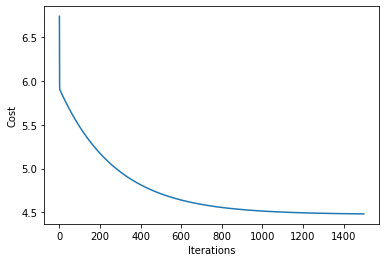

In [96]:
plt.figure()
plt.plot(np.arange(num_iters), J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


# Linear regression with multiple variables

In [97]:
data = np.loadtxt("ex1data2.txt", delimiter=',')
X = data[:, [0, 1]]
y = data[:, 2]
X[:3]

array([[2104.,    3.],
       [1600.,    3.],
       [2400.,    3.]])

In [98]:
# Feature Scalling

def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, ddof=1, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [99]:
X_train, mu, sigma = featureNormalize(X)

In [100]:
# Cost Function & Gradient Descent

def computeCostMulti(X, y, theta):
    h = np.dot(X, theta) - y
    J = np.dot(h, h) / (2 * X.shape[0])
    return J
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        theta = (theta - (alpha / X.shape[0])
                 * np.dot(X.T, (np.dot(X, theta) - y)))   
        J_history[i] = computeCostMulti(X, y, theta)
    return theta, J_history

In [101]:
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
theta = np.zeros(3)
alpha = 0.01
num_iters = 400
theta, J_history = gradientDescent(X_train, y, theta, alpha, num_iters)
print(theta)

[334302.06399328 100087.11600585   3673.54845093]


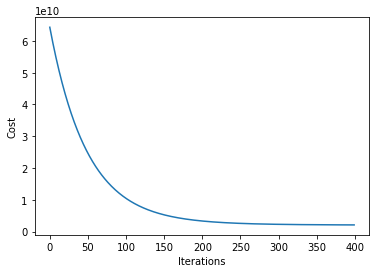

In [102]:
plt.figure()
plt.plot(np.arange(num_iters), J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

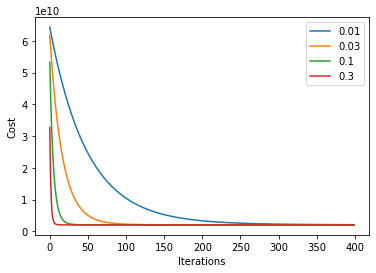

In [103]:
# different learning rates


alphas = [0.01, 0.03, 0.1, 0.3]
plt.figure()
for alpha in alphas:
    theta = np.zeros(3)
    num_iters = 400
    theta, J_history = gradientDescent(X_train, y, theta, alpha, num_iters)
    plt.plot(np.arange(num_iters), J_history, label=str(alpha))
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [104]:
price = 0
price = price + theta[0]
price = price + theta[1] * (1650 - mu[0]) / sigma[0]
price = price + theta[2] * (3 - mu[1]) / sigma[1]
print(price)

293081.46433489607


# Normal Equations

In [84]:
data = np.loadtxt("ex1data2.txt", delimiter=',')
X = data[:, [0, 1]]
y = data[:, 2]
X_train = np.hstack((np.ones((X.shape[0], 1)), X))

In [85]:
def normalEqn(X, y):
    return np.dot(np.dot(np.linalg.pinv(np.dot(X.T, X)), X.T), y)

In [86]:
theta_n = normalEqn(X_train, y)
print(theta_n)

[89597.90954361   139.21067402 -8738.01911255]


In [87]:
price = 0
price = price + theta_n[0]
price = price + theta_n[1] * 1650
price = price + theta_n[2] * 3
print(price)

293081.46433498926
